In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" #forlast line "last_expr"
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt

In [71]:
folder_path = "/home/thivanka/catkin_ws/src/uri_soft_wip/catabot_project/catabot_phd_tracking/plots/"
file_date   = "2023681722"

standard_filter_csv = "Standard"
adaptive_filter_csv = "Adaptive"
adaptive_modified_filter_csv = "Adaptive_modified"

color_list = ['g', 'b']

filter_dict = {
    "Standard" : folder_path+file_date+standard_filter_csv + "_alldata.csv",
    "Adaptive" : folder_path+file_date+adaptive_filter_csv + "_alldata.csv",
    "Adaptive_SS" : folder_path+file_date+adaptive_modified_filter_csv + "_alldata.csv"
}

df_list = {}
for key in filter_dict:
    print (key, filter_dict[key])
    df = pd.read_csv(filter_dict[key], keep_default_na=False) 
    df_list[key] = df
df_list["Adaptive_SS"]['color'] = 'm'

# all pd plots
list_to_scatter_plot = {
    "Probability of Detection ($P_D^i$)"            : ['pdx','pdy',"_pd"],
    "Probability of Survival ($P_S^i$)"             : ['psx','ps', "_ps"],
    "Probability of Detection ($P_D^i$) - Camera"   : ['pdCamx', 'pdCamy',"_pdCam"],
    "Probability of Detection ($P_D^i$) - Lidar"    : ['pd_lidx', 'pd_lidy', "_pdLidar"],
}

# df = pd.read_csv(filter_dict["Standard"])

Standard /home/thivanka/catkin_ws/src/uri_soft_wip/catabot_project/catabot_phd_tracking/plots/2023681431Standard_alldata.csv
Adaptive /home/thivanka/catkin_ws/src/uri_soft_wip/catabot_project/catabot_phd_tracking/plots/2023681431Adaptive_alldata.csv
Adaptive_SS /home/thivanka/catkin_ws/src/uri_soft_wip/catabot_project/catabot_phd_tracking/plots/2023681431Adaptive_modified_alldata.csv


<function matplotlib.pyplot.cla()>

Text(0.5, 0, 'Time Steps (k)')

Text(0, 0.5, 'Sum of Errors')

ValueError: x and y must be the same size

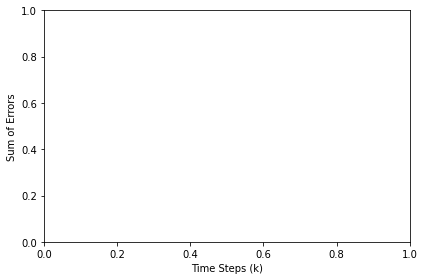

In [72]:
plt.cla
plt.xlabel("Time Steps (k)")
plt.ylabel("Sum of Errors")
plt.tight_layout()
# plt.ylim (0, 1)
a = 1.0
table_data = {}
for key in df_list:
    globals()["label_w" + str(key)]     = key
    x     = df_list[key]['x'].loc[lambda s: s != ""]
    x = x.astype('float')
    y     = df_list[key]['error'].loc[lambda s: s != ""]
    y = y.astype('float')
    globals()["pd_scat" + str(key)] = plt.scatter(x, 
                                                    y, 
                                                    color = df_list[key]['color'].loc[0], 
                                                    label = globals()["label_w" + key],
                                                    alpha = a,
                                                    marker= df_list[key]['marker'][0]
                                                    )
    sumoferror = float(df_list[key]['sumOfError'][0])/x.shape[0]
    print(x.shape[0])
    table_data[key] = sumoferror
    a = a - 0.3
# label_count_list.append(globals()["line" + str(idx) +","])
# label_names_list.append(globals()["label_w" + str(idx)])
# self.figure_1.legend(label_count_list, label_names_list)
plt.legend(loc='lower left', borderaxespad = 1)
plt.savefig(folder_path + file_date+ "_error" + '.png', format="png",dpi = 200)
# figure_6.savefig(path_to_save_plot + figname+ "_mvg" + '.png', format="png",dpi = 100)
plt.show()
table_to_save = pd.DataFrame.from_dict(table_data, orient='index')
table_to_save.to_csv(folder_path + file_date+"_Error_table.txt")
print(table_data)
print("[plotter] plot saved "+ "_error")

<function matplotlib.pyplot.cla()>

Text(0.5, 0, 'Time Steps (k)')

Text(0, 0.5, 'Sum of Weights - Moving Average')

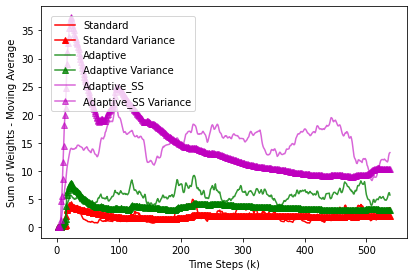

[plotter] plot saved - Moving Avg


In [73]:
# matplotlib.use('Agg')

#MOVING AVERAGE PLOT
# plt.cla
# figure_6 = plt.figure(6)
plt.cla
plt.xlabel("Time Steps (k)")
plt.ylabel("Sum of Weights - Moving Average")
# plt.ylim (0, 6)
plt.tight_layout()
a = 1.0
for key in df_list:
    globals()["label_w" + str(key)]     = key
    x     = df_list[key]['x'].loc[lambda s: s != ""]
    x     = x.astype('float')
    mavg  = df_list[key]['mavg'].loc[lambda s: s != ""]
    mavg  = mavg.astype('float')
    var   = df_list[key]['variance'].loc[lambda s: s != ""]
    var   = var.astype('float')
    globals()["line" + str(key) +","]   = plt.plot( x, 
                                                    mavg, 
                                                    df_list[key]['color'].loc[0], 
                                                    label = globals()["label_w" + key],
                                                    alpha = a
                                                  )
    globals()["label_w" + str(key)]     = key +" Variance"
    globals()["line" + str(key) +","]   = plt.plot( x, 
                                                    var, 
                                                    df_list[key]['color'].loc[0],
                                                    marker = "^", 
                                                    label = globals()["label_w" + key],
                                                    alpha = a
                                                  )
    a = a - 0.2
    # label_count_list.append(globals()["line" + str(idx) +","])
    # label_names_list.append(globals()["label_w" + str(idx)])
# self.figure_1.legend(label_count_list, label_names_list)
plt.legend(loc='upper left', borderaxespad = 1)
plt.savefig(folder_path + file_date+ "_mvg" + '.png', format="png",dpi = 200)
# figure_6.savefig(path_to_save_plot + figname+ "_mvg" + '.png', format="png",dpi = 100)
plt.show()
print("[plotter] plot saved - Moving Avg")

<function matplotlib.pyplot.cla()>

Text(0.5, 0, 'X Coordinates (m)')

Text(0, 0.5, 'Y Coordinates (m)')

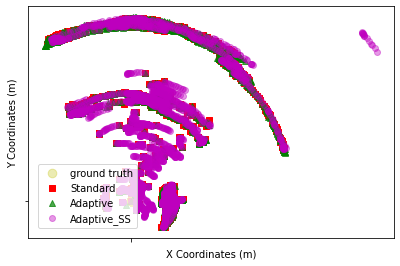

[plotter] plot saved _error


In [74]:
plt.cla
plt.xlabel("X Coordinates (m)")
plt.ylabel("Y Coordinates (m)")
plt.tight_layout()
# plt.ylim (0, 1)
a = 1.0
xy_scatter_groundtruth = plt.scatter( df_list["Standard"]["xsgt"], df_list["Standard"]["ysgt"], marker='.', color = 'y', label = "ground truth", alpha = 0.3, s= 300)
for key in df_list:
    globals()["label_w" + str(key)]     = key
    x     = df_list[key]['posX'].loc[lambda s: s != ""]
    x = x.astype('float')
    y     = df_list[key]['posY'].loc[lambda s: s != ""]
    y = y.astype('float')
    globals()["pd_scat" + str(key)]   = plt.scatter(x, 
                                                    y, 
                                                    color = df_list[key]['color'].loc[0], 
                                                    label = globals()["label_w" + key],
                                                    alpha = a,
                                                    marker= df_list[key]['marker'][0]
                                                    )
    a = a - 0.3
# label_count_list.append(globals()["line" + str(idx) +","])
# label_names_list.append(globals()["label_w" + str(idx)])
# self.figure_1.legend(label_count_list, label_names_list)
plt.legend(loc='lower left', borderaxespad = 1)
plt.savefig(folder_path + file_date+ "_path" + '.png', format="png",dpi = 200)
# figure_6.savefig(path_to_save_plot + figname+ "_mvg" + '.png', format="png",dpi = 100)
plt.show()
print("[plotter] plot saved "+ "_error")

<function matplotlib.pyplot.cla()>

Text(0.5, 0, 'Time Steps (k)')

Text(0, 0.5, 'Probability of Detection ($P_D^i$)')

(0.0, 1.0)

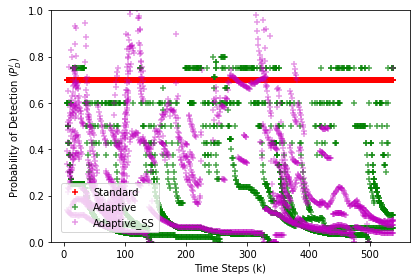

[plotter] plot saved _pd


<function matplotlib.pyplot.cla()>

Text(0.5, 0, 'Time Steps (k)')

Text(0, 0.5, 'Probability of Survival ($P_S^i$)')

(0.0, 1.0)

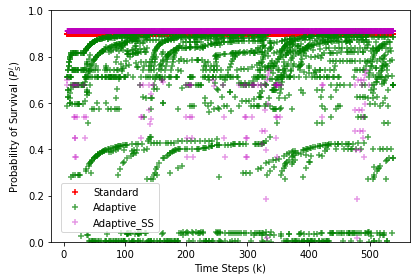

[plotter] plot saved _ps


<function matplotlib.pyplot.cla()>

Text(0.5, 0, 'Time Steps (k)')

Text(0, 0.5, 'Probability of Detection ($P_D^i$) - Camera')

(0.0, 1.0)

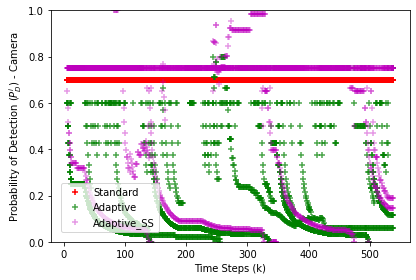

[plotter] plot saved _pdCam


<function matplotlib.pyplot.cla()>

Text(0.5, 0, 'Time Steps (k)')

Text(0, 0.5, 'Probability of Detection ($P_D^i$) - Lidar')

(0.0, 1.0)

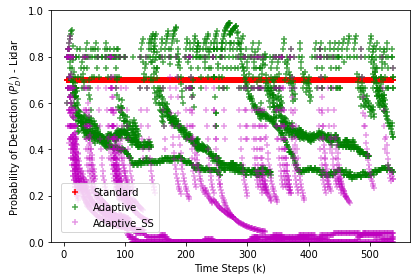

[plotter] plot saved _pdLidar


In [75]:
#scatter plots

for plot_key in list_to_scatter_plot :
    plt.cla
    plt.xlabel("Time Steps (k)")
    plt.ylabel(plot_key)
    plt.tight_layout()
    plt.ylim (0, 1)
    a = 1.0
    for key in df_list:
      globals()["label_w" + str(key)]     = key
      x     = df_list[key][list_to_scatter_plot[plot_key][0]].loc[lambda s: s != ""]
      y     = df_list[key][list_to_scatter_plot[plot_key][1]].loc[lambda s: s != ""]
      x = x.astype('float')
      y = y.astype('float')
      globals()["pd_scat" + str(key)]   = plt.scatter(x, 
                                                      y, 
                                                      color = df_list[key]['color'].loc[0], 
                                                      label = globals()["label_w" + key],
                                                      alpha = a,
                                                      marker= '+'
                                                      )
      a = a - 0.3
    # label_count_list.append(globals()["line" + str(idx) +","])
    # label_names_list.append(globals()["label_w" + str(idx)])
    # self.figure_1.legend(label_count_list, label_names_list)
    plt.legend(loc='lower left', borderaxespad = 1)
    plt.savefig(folder_path + file_date+ list_to_scatter_plot[plot_key][2] + '.png', format="png",dpi = 200)
    # figure_6.savefig(path_to_save_plot + figname+ "_mvg" + '.png', format="png",dpi = 100)
    plt.show()
    print("[plotter] plot saved "+ list_to_scatter_plot[plot_key][2])

In [7]:
# for key in df_list:
#     globals()["label_w" + str(key)]     = key
#     x     = df_list[key]['x'].loc[lambda s: s != ""]
#     x = x.astype('float')
#     y     = df_list[key]['error'].loc[lambda s: s != ""]
#     y = y.astype('float')
#     print(key)
#     print(x,y)
#     # print(y)

In [8]:
# #Probability of Detection Total"
# # plt.cla
# # figure_6 = plt.figure(6)
# plt.cla
# plt.xlabel("Time Steps (k)")
# plt.ylabel("Probability of Detection ($P_D^i$)")
# plt.ylim(0,1.0)
# plt.tight_layout()
# a = 1.0
# for key in df_list:
#     globals()["label_w" + str(key)]     = key
#     x     = df_list[key]['pdx'].loc[lambda s: s != ""]
#     # x     = x.astype('float')
#     y  = df_list[key]['pdy'].loc[lambda s: s != ""]
#     # y  = y.astype('float')
#     globals()["pd_scat" + str(key)]   = plt.scatter(x, 
#                                                     y, 
#                                                     color = df_list[key]['color'].loc[0], 
#                                                     label = globals()["label_w" + key],
#                                                     alpha = a,
#                                                     marker= '+'
#                                                   )
#     a = a - 0.4
#     # label_count_list.append(globals()["line" + str(idx) +","])
#     # label_names_list.append(globals()["label_w" + str(idx)])
# # self.figure_1.legend(label_count_list, label_names_list)
# plt.legend(loc='lower left', borderaxespad = 1)
# # plt.savefig(folder_path + file_date+ "_weights" + '.png', format="png",dpi = 100)
# # figure_6.savefig(path_to_save_plot + figname+ "_mvg" + '.png', format="png",dpi = 100)
# plt.show()
# print("[plotter] plot saved - Probability of Detection Total")